<a href="https://colab.research.google.com/github/ElphysAlvarez01/Project1/blob/Priscilla-branch/birth_rate_prophet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Birth_Rate.csv to Birth_Rate (3).csv


In [ ]:
birth_rate_df = pd.read_csv("Birth_Rate.csv")
birth_rate_df.head()

,DATE,SPDYNCBRTINUSA
0,1960-01-01,23.7
1,1961-01-01,23.3
2,1962-01-01,22.4
3,1963-01-01,21.7
4,1964-01-01,21.1


In [ ]:
birth_rate_df = birth_rate_df.rename( columns={"SPDYNCBRTINUSA":"Crude Birth Rate"})

In [ ]:
birth_rate_df['DATE'] = pd.to_datetime(birth_rate_df['DATE'])

In [ ]:
birth_year_df = birth_rate_df[["DATE", "Crude Birth Rate"]]

In [ ]:
birth_year_df.set_index("DATE")

,Crude Birth Rate
DATE,
1960-01-01,23.7
1961-01-01,23.3
1962-01-01,22.4
1963-01-01,21.7
1964-01-01,21.1
...,...
2017-01-01,11.8
2018-01-01,11.6
2019-01-01,11.4


<Axes: xlabel='DATE'>

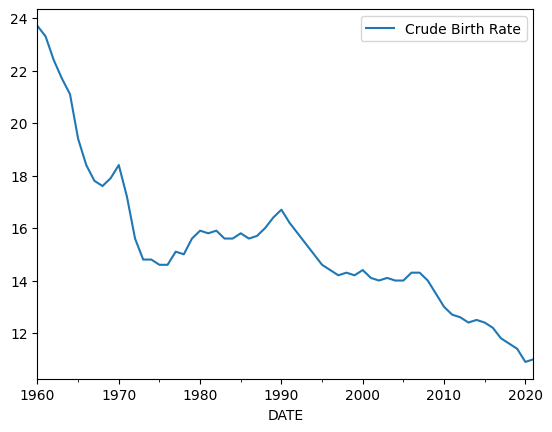

In [ ]:
birth_year_df.plot(x="DATE")

In [ ]:
#Renamed the columns to the Prophet model syntax
birth_year_df.columns = ["ds", "y"]
birth_year_df.tail()

,ds,y
57,2017-01-01,11.8
58,2018-01-01,11.6
59,2019-01-01,11.4
60,2020-01-01,10.9
61,2021-01-01,11.0


In [ ]:
#Created a prophet model
m = Prophet()

In [ ]:
#Fitting the model
m.fit(birth_year_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykq8t9bv/ov6cahlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykq8t9bv/mdvvd8gz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81159', 'data', 'file=/tmp/tmpykq8t9bv/ov6cahlb.json', 'init=/tmp/tmpykq8t9bv/mdvvd8gz.json', 'output', 'file=/tmp/tmpykq8t9bv/prophet_modelawminevv/prophet_model-20240516173659.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:36:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast one year of weekly future trends data for Canada
future_births = m.make_future_dataframe(periods=20, freq="Y")

# Display the last five rows of the future_canada DataFrame
future_births.tail()

,ds
77,2036-12-31
78,2037-12-31
79,2038-12-31
80,2039-12-31
81,2040-12-31


In [ ]:
birth_forecast = m.predict(future_births)
birth_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,0.070940,22.377100,23.716629,0.070940,0.070940,22.941081,22.941081,22.941081,22.941081,22.941081,22.941081,0.0,0.0,0.0,23.012020
1,1961-01-01,-0.515578,21.849955,23.118946,-0.515578,-0.515578,22.959127,22.959127,22.959127,22.959127,22.959127,22.959127,0.0,0.0,0.0,22.443548
2,1962-01-01,-1.100494,21.249632,22.549162,-1.100494,-1.100494,22.979638,22.979638,22.979638,22.979638,22.979638,22.979638,0.0,0.0,0.0,21.879145
3,1963-01-01,-1.685409,20.669294,21.963478,-1.685409,-1.685409,22.973598,22.973598,22.973598,22.973598,22.973598,22.973598,0.0,0.0,0.0,21.288189
4,1964-01-01,-2.270324,20.015254,21.321015,-2.270324,-2.270324,22.941081,22.941081,22.941081,22.941081,22.941081,22.941081,0.0,0.0,0.0,20.670757


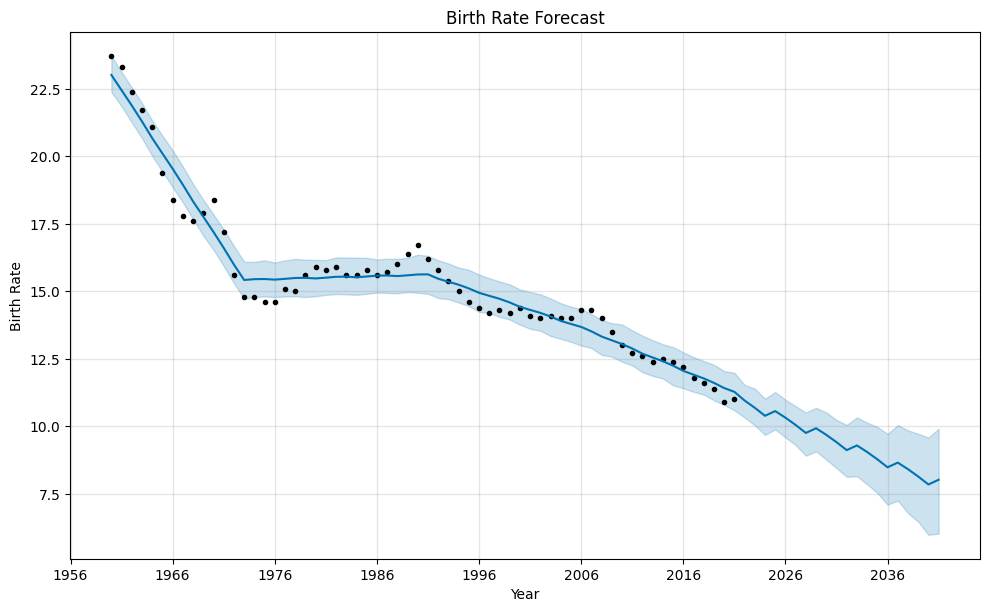

In [ ]:
fig = m.plot(birth_forecast)

plt.title('Birth Rate Forecast')

ax = fig.get_axes()[0]
ax.set_xlabel('Year')
ax.set_ylabel('Birth Rate')

plt.show()

In [ ]:
birth_forecast.set_index("ds", inplace=True)


birth_forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail()


,yhat,yhat_lower,yhat_upper
ds,,,
2036-12-31,8.659142,7.254900,10.046086
2037-12-31,8.415206,6.785919,9.853898
2038-12-31,8.145244,6.473890,9.725822
2039-12-31,7.849482,5.986747,9.587188
2040-12-31,8.023341,6.030246,9.912510


<Axes: xlabel='ds'>

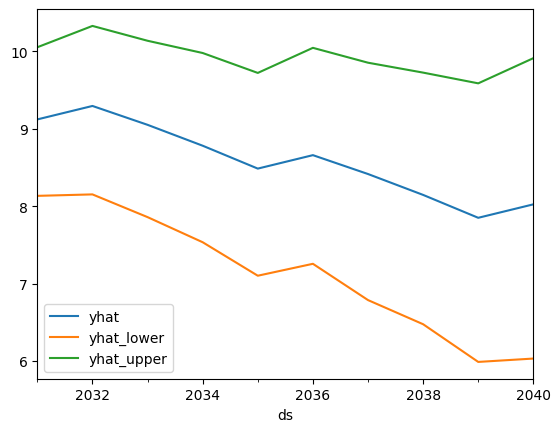

In [ ]:
birth_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-10:,:].plot()


KeyError: 'ds'

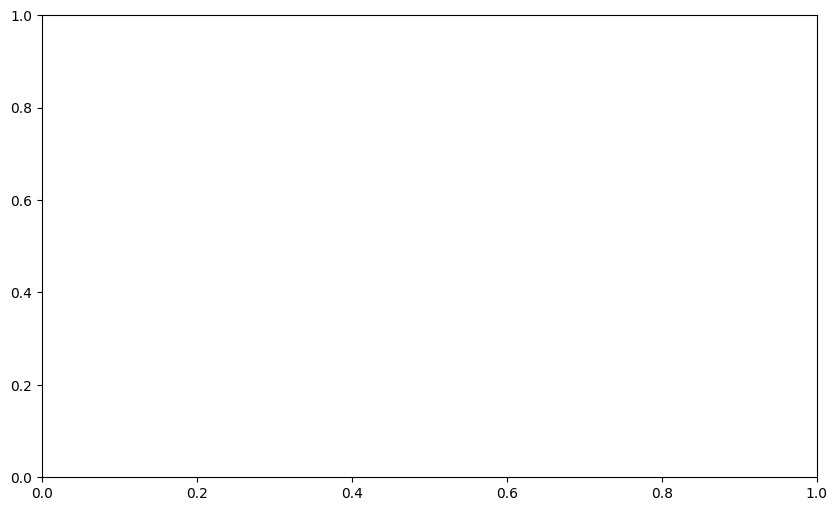

In [ ]:
fig = m.plot(birth_forecast)

plt.xlabel('Year')
plt.ylabel('Birth Rate')

plt.show()